# Energy Usage Dataset

## Table of Contents

1. [Imports](#Imports) <br>

2. [Load Data](#Load-Data) <br>

3. [Data Attributes](#Data-Attributes)<br>

4. [Check for Nulls](#Check-for-Nulls) <br>

5. [Transform Time Series Data](#Transform-Time-Series-Data) <br>

6. [Feature Transformations](#Feature-Transformations)<br>

7. [Correlations](#Correlations)<br>

8. [Rooms](#Rooms)<br>

9. [Visualizations](#Visualizations)<br>

10. [Model for Total Consumption](#Model-for-Total-Consumption)

10. [Model for Trailing 24 Hour Consumption](#Model-for-Trailing-24-Hour-Consumption)<br>

11. [Ideas for Improving Model](#Ideas-for-Improving-Model)

# Imports

In [1]:
# install latest version of seaborn to run relplots
# !!!will only work if installed before importing seaborn!!!
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
# Main Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

# train-test split
from sklearn.model_selection import train_test_split

# linear regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

# cross val, k-folds, scaler, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


# ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
warnings.filterwarnings("ignore", category=Warning)
print('Warnings will be ignored!')

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Warnings will be ignored!


# Load Data

In [0]:
orig = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/energy_usage.csv')
df = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/energy_usage.csv')

# Data Attributes

In [4]:
print(orig.head())

              date  TotalConsmp       R1      H_1       R2      H_2       R3  \
0  1/11/2016 17:00           90 19.89000 47.59667 19.20000 44.79000 19.79000   
1  1/11/2016 17:10           90 19.89000 46.69333 19.20000 44.72250 19.79000   
2  1/11/2016 17:20           80 19.89000 46.30000 19.20000 44.62667 19.79000   
3  1/11/2016 17:30           90 19.89000 46.06667 19.20000 44.59000 19.79000   
4  1/11/2016 17:40          100 19.89000 46.33333 19.20000 44.53000 19.79000   

       H_3       R4      H_4     ...          H_7       R8      H_8       R9  \
0 44.73000 19.00000 45.56667     ...     41.62667 18.20000 48.90000 17.03333   
1 44.79000 19.00000 45.99250     ...     41.56000 18.20000 48.86333 17.06667   
2 44.93333 18.92667 45.89000     ...     41.43333 18.20000 48.73000 17.00000   
3 45.00000 18.89000 45.72333     ...     41.29000 18.10000 48.59000 17.00000   
4 45.00000 18.89000 45.53000     ...     41.23000 18.10000 48.59000 17.00000   

       H_9  TempOutSide  Press_mm_hg  

In [5]:
print(orig.describe())

       TotalConsmp          R1         H_1          R2         H_2  \
count  19735.00000 19735.00000 19735.00000 19735.00000 19735.00000   
mean     101.49683    21.68657    40.25974    20.34122    40.42042   
std      104.38083     1.60607     3.97930     2.19297     4.06981   
min       10.00000    16.79000    27.02333    16.10000    20.46333   
25%       50.00000    20.76000    37.33333    18.79000    37.90000   
50%       60.00000    21.60000    39.65667    20.00000    40.50000   
75%      100.00000    22.60000    43.06667    21.50000    43.26000   
max     1110.00000    26.26000    63.36000    29.85667    56.02667   

               R3         H_3          R4         H_4          R5     ...      \
count 19735.00000 19735.00000 19735.00000 19735.00000 19735.00000     ...       
mean     22.26761    39.24250    20.85533    39.02690    19.59211     ...       
std       2.00611     3.25458     2.04288     4.34132     1.84462     ...       
min      17.20000    28.76667    15.10000    

In [6]:
print(orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 25 columns):
date           19735 non-null object
TotalConsmp    19735 non-null int64
R1             19735 non-null float64
H_1            19735 non-null float64
R2             19735 non-null float64
H_2            19735 non-null float64
R3             19735 non-null float64
H_3            19735 non-null float64
R4             19735 non-null float64
H_4            19735 non-null float64
R5             19735 non-null float64
H_5            19735 non-null float64
R6             19735 non-null float64
H_6            19735 non-null float64
R7             19735 non-null float64
H_7            19735 non-null float64
R8             19735 non-null float64
H_8            19735 non-null float64
R9             19735 non-null float64
H_9            19735 non-null float64
TempOutSide    19735 non-null float64
Press_mm_hg    19735 non-null float64
H_OutSide      19735 non-null float64
Windspeed      19735

# Check for Nulls

In [7]:
orig.isnull().sum()

date           0
TotalConsmp    0
R1             0
H_1            0
R2             0
H_2            0
R3             0
H_3            0
R4             0
H_4            0
R5             0
H_5            0
R6             0
H_6            0
R7             0
H_7            0
R8             0
H_8            0
R9             0
H_9            0
TempOutSide    0
Press_mm_hg    0
H_OutSide      0
Windspeed      0
Visibility     0
dtype: int64

# Transform Time Series Data

In [8]:
# view of first 20 dates
df['date'][:20]

0     1/11/2016 17:00
1     1/11/2016 17:10
2     1/11/2016 17:20
3     1/11/2016 17:30
4     1/11/2016 17:40
5     1/11/2016 17:50
6     1/11/2016 18:00
7     1/11/2016 18:10
8     1/11/2016 18:20
9     1/11/2016 18:30
10    1/11/2016 18:40
11    1/11/2016 18:50
12    1/11/2016 19:00
13    1/11/2016 19:10
14    1/11/2016 19:20
15    1/11/2016 19:30
16    1/11/2016 19:40
17    1/11/2016 19:50
18    1/11/2016 20:00
19    1/11/2016 20:10
Name: date, dtype: object

In [9]:
# generate random numbers for df; then look at 25 random values for 'date'
rand_numbers = np.random.randint(0,len(df['date'])-1,20)

for i in rand_numbers:
  print(df['date'][i])

4/19/2016 17:20
5/16/2016 12:50
4/27/2016 17:00
4/7/2016 17:40
5/11/2016 4:10
1/27/2016 2:30
2/13/2016 5:10
4/5/2016 23:20
4/24/2016 7:00
5/4/2016 3:40
2/25/2016 13:40
3/3/2016 17:00
5/25/2016 18:30
4/3/2016 20:20
2/18/2016 10:30
3/3/2016 15:30
2/20/2016 2:00
3/28/2016 20:00
5/11/2016 19:10
2/24/2016 23:20


In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
# create function to extract datetime features
def date_extraction(feature):
  month_list = []
  day_list = []  
  day_of_week_list = []
  day_of_year_list = []
  hour_list = []
  
  for i in feature:
    month_list.append(i.month)
    day_list.append(i.day)
    day_of_week_list.append(i.dayofweek)
    day_of_year_list.append(i.dayofyear)
    hour_list.append(i.hour)
    
  return month_list, day_list, day_of_week_list, day_of_year_list, hour_list

In [0]:
df['month'] = date_extraction(df['date'])[0]
df['day'] = date_extraction(df['date'])[1]
df['day_of_week'] = date_extraction(df['date'])[2]
df['day_of_year'] = date_extraction(df['date'])[3]
df['hour'] = date_extraction(df['date'])[4]

In [0]:
# create days dictionary to map day of week values out
days_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3:'Thursday', 
            4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [0]:
df['day_week_alpha'] = df['day_of_week'].map(days_dict)

In [0]:
df['hour_of_week'] = (df['day_of_week'] * 24) + df['hour']

In [0]:
# add categorical variable for time of day; peak hours at highest
tod_list = []

for i in range(len(df)):
  if df['hour'][i] < 4:
    tod_list.append(0)
  elif df['hour'][i] >= 19:
    tod_list.append(1)
  elif df['hour'][i] >= 4 and df['hour'][i] < 9:
    tod_list.append(2)
  else:
    tod_list.append(3)
    
df['time_of_day_1'] = tod_list

In [0]:
# add 2nd time of day variable; peak hours = 5, sleeptime = 0
tod_list_2 = []

for i in range(len(df)):
  
  # peak sleep hours = 0
  if df['hour'][i] < 6:
    tod_list_2.append(0)
  elif df['hour'][i] >= 23:
    tod_list_2.append(0)
    
  # early morning and late evening = 1
  elif df['hour'][i] >= 6 and df['hour'][i] < 8:
    tod_list_2.append(1)
  elif df['hour'][i] >= 21 and df['hour'][i] < 23:
    tod_list_2.append(1)
    
  # after-lunch and mid-evening = 2
  elif df['hour'][i] >= 13 and df['hour'][i] < 16:
    tod_list_2.append(2)
  elif df['hour'][i] >= 8 and df['hour'][i] < 10:
    tod_list_2.append(2)
    
  # lunch and late afternoon = 3
  elif df['hour'][i] >= 10 and df['hour'][i] < 13:
    tod_list_2.append(3)
  elif df['hour'][i] == 16:
    tod_list_2.append(3)
    
  # evening = 4
  elif df['hour'][i] >= 19 and df['hour'][i] < 21:
    tod_list_2.append(4)
    
  # peak dinner hours = 5
  elif df['hour'][i] >= 17 and df['hour'][i] < 19:
    tod_list_2.append(5)
    
#   else:
#     tod_list_2.append(3)
    
df['time_of_day_2'] = tod_list_2

# Feature Transformations

In [0]:
# average temperatures excluding Room 6
df['avr_room_temp'] = (df['R1'] + df['R2'] + df['R3'] + df['R4'] + df['R5'] + df['R7'] + df['R8'] + df['R9'])/8
df['avr_room_hum'] = (df['H_1'] + df['H_2'] + df['H_3'] + df['H_4'] + df['H_5'] + df['H_7'] + df['H_8'] + df['H_9'])/8

In [0]:
# add column that finds difference on Total Consumption between 2 consecutive datapoints 
df['incr_prior'] = np.abs(df['TotalConsmp'] - df['TotalConsmp'].shift(1))
df['incr_prior'][0] = 0

In [0]:
df['incr_prior_%'] = df['incr_prior'] / df['TotalConsmp']

In [0]:
# create 90 minute average consumption variable (current time, +/- 4 prior 10 min intervals)
avr_list = []

for i in range(len(df)):
  if np.mean(df['TotalConsmp'][i-4:i+4]) is not np.nan:
    avr_list.append(np.mean(df['TotalConsmp'][i-4:i+4]))
  else:
    avr_list.append(df['TotalConsmp'][i])

    
df['consmp_90m_avr'] = avr_list

In [0]:
# create 24 hour consumption variable
energy24_list = []

for i in range(len(df)):
  if np.mean(df['TotalConsmp'][i-143:i]) is not np.nan:
    energy24_list.append(np.sum(df['TotalConsmp'][i-143:i+1]))
  else:
    energy24_list.append(np.sum(df['TotalConsmp'][0:143]))

    
df['consmp_24h'] = energy24_list

In [0]:
# conversion to Fahrenheit for heat index
df['TempOutSide_F'] = (df['TempOutSide'] * 9/5) + 32

In [0]:
# heat index in F
df['HeatIndex_F'] = 0.5 * (df['TempOutSide_F'] + 61 + ((df['TempOutSide_F'] - 68) * 1.2) + (df['H_OutSide'] * 0.094))

In [0]:
# heat index converted back to Celsius
df['HeatIndex_C'] = (df['HeatIndex_F'] - 32) * 5/9

In [0]:
# wind chill in F
# note that windspeed calculated in m/s; converted to mph at 1 : 2.23694 ratio

df['WindChill_F'] = (35.74 + (0.6215 * df['TempOutSide_F']) - (35.75 * ((df['Windspeed'] * 2.23694) * 0.16)) + (0.4275 * df['TempOutSide_F'])
                    * ((df['Windspeed'] * 2.23694) * 0.16))

df['WindChill_C'] = (df['WindChill_F'] - 32) * 5/9

In [0]:
# features that examines room temps vs outside temps
df['AvrRoomTemp_v_Outside'] = df['avr_room_temp'] - df['TempOutSide']

In [0]:
# features that examines room temps vs windchill
df['AvrRoomTemp_v_Windchill'] = df['avr_room_temp'] - df['WindChill_C']

In [0]:
# air conditioning binomial
ac_list = []

for i in range(len(df)):
  if df['AvrRoomTemp_v_Outside'][i] < -2:
    ac_list.append(1)
  else:
    ac_list.append(0)
    
df['AC'] = ac_list

In [0]:
# heating binominal
heat_list = []

for i in range(len(df)):
  if df['AvrRoomTemp_v_Outside'][i] > 2:
    heat_list.append(1)
  else:
    heat_list.append(0)
    
df['Heat'] = heat_list

In [0]:
room_list = ['R1', 'R2', 'R3',  'R4', 'R5', 'R6',  'R7', 'R8']
hum_list = ['H_1', 'H_2', 'H_3', 'H_4', 'H_5', 'H_6', 'H_7', 'H_8']

In [0]:
for i in df[room_list]:
  temp_diff = i + "_Diff"
#   temp_diff_abs = i + "_Diff_Abs"
  df[temp_diff] = df[i] - df['TempOutSide']
#   df[temp_diff_abs] = np.abs(df[temp_diff])  

In [0]:
for i in df[hum_list]:
  hum_diff = i + "_Diff"
  df[hum_diff] = df[i] - df['H_OutSide']

In [0]:
# print(df[140:200].to_string())

In [0]:
df.to_csv("energy_usage_mod.csv",index=False)

from google.colab import files
files.download('energy_usage_mod.csv')

In [0]:
# added more features with excel; loading modified csv file
df = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Energy-Consumption/master/energy_usage_mod.csv')

# Correlations

In [37]:
df.columns

Index(['date', 'TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'day_week_alpha',
       'hour_of_week', 'time_of_day_1', 'time_of_day_2', 'avr_room_temp',
       'avr_room_hum', 'incr_prior', 'incr_prior_%', 'consmp_90m_avr',
       'consmp_24h', 'TempOutSide_F', 'HeatIndex_F', 'HeatIndex_C',
       'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'AC', 'Heat', 'R1_Diff', 'R2_Diff',
       'R3_Diff', 'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff', 'R8_Diff',
       'H_1_Diff', 'H_2_Diff', 'H_3_Diff', 'H_4_Diff', 'H_5_Diff', 'H_6_Diff',
       'H_7_Diff', 'H_8_Diff', 'R1_24H_Diff', 'R2_24H_Diff', 'R3_24H_Diff',
       'R4_24H_Diff', 'R5_24H_Diff', 'R6_24H_Diff', 'R7_24H_Diff',
       'R8_24H_Diff', 'H_1_24H_Diff', 'H_2_24H_Dif

In [0]:
# re-arrange colums so that all consumption features in front
df_mod = df[['TotalConsmp', 'consmp_90m_avr', 'consmp_24h', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 
       'hour_of_week', 'time_of_day_1', 'time_of_day_2', 'avr_room_temp',
       'avr_room_hum', 'TempOutSide_F', 'HeatIndex_F', 'HeatIndex_C',
       'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'Heat', 'R1_Diff', 'R2_Diff',
       'R3_Diff', 'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff', 'R8_Diff',
       'H_1_Diff', 'H_2_Diff', 'H_3_Diff', 'H_4_Diff', 'H_5_Diff', 'H_6_Diff',
       'H_7_Diff', 'H_8_Diff', 'R1_24H_Diff', 'R2_24H_Diff', 'R3_24H_Diff',
       'R4_24H_Diff', 'R5_24H_Diff', 'R6_24H_Diff', 'R7_24H_Diff',
       'R8_24H_Diff', 'H_1_24H_Diff', 'H_2_24H_Diff', 'H_3_24H_Diff',
       'H_4_24H_Diff', 'H_5_24H_Diff', 'H_6_24H_Diff', 'H_7_24H_Diff',
       'H_8_24H_Diff']]

## All Correlations

This heatmap shows correlations between all variables in the dataset. We're more interested, however, in specific correlations between energy consumption variables and other features.

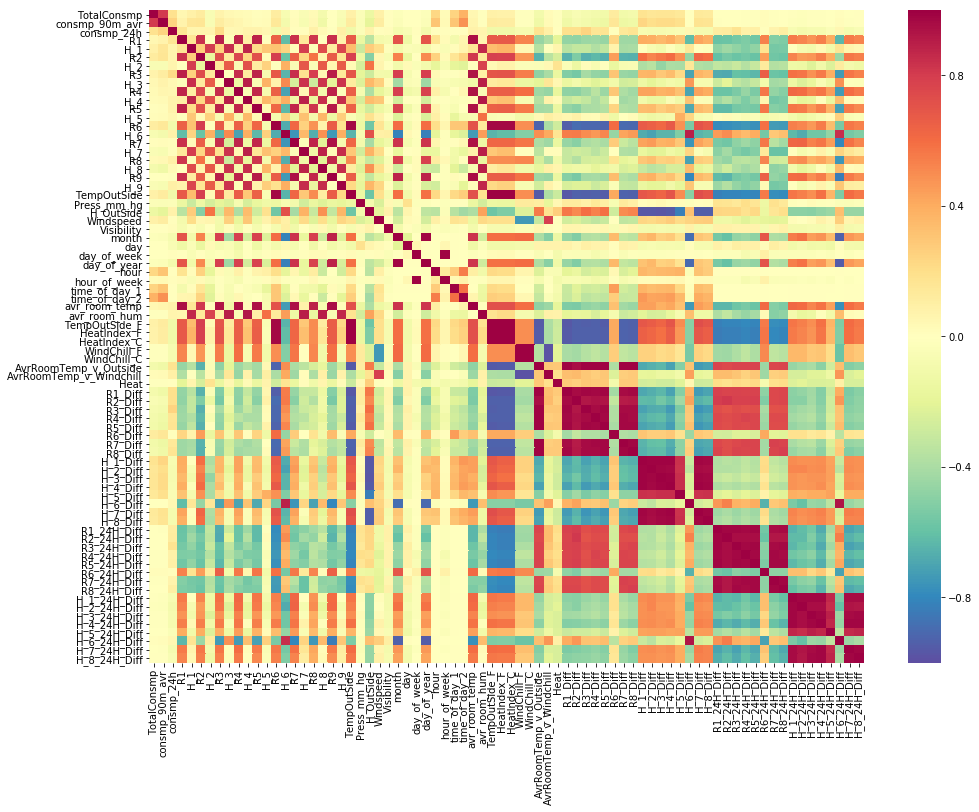

In [43]:
# all correlations heatmap
corr_df = df_mod

corr1 = corr_df.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr1, vmin=-1, vmax=1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values, cmap='Spectral_r');

## Energy Consumption Correlations

This heatmap shows correlations between our 3 energy consumption variables and other features. 

* The 'consmp_24' variable, which measures energy consumption over a full 24 hours, shows stronger correlations than the other two leading to better predictions
* The downside to the 24-hour consumption variable is that it's not nearly good as "time of day" predictions; it's more useful for daily energy consumption predictions

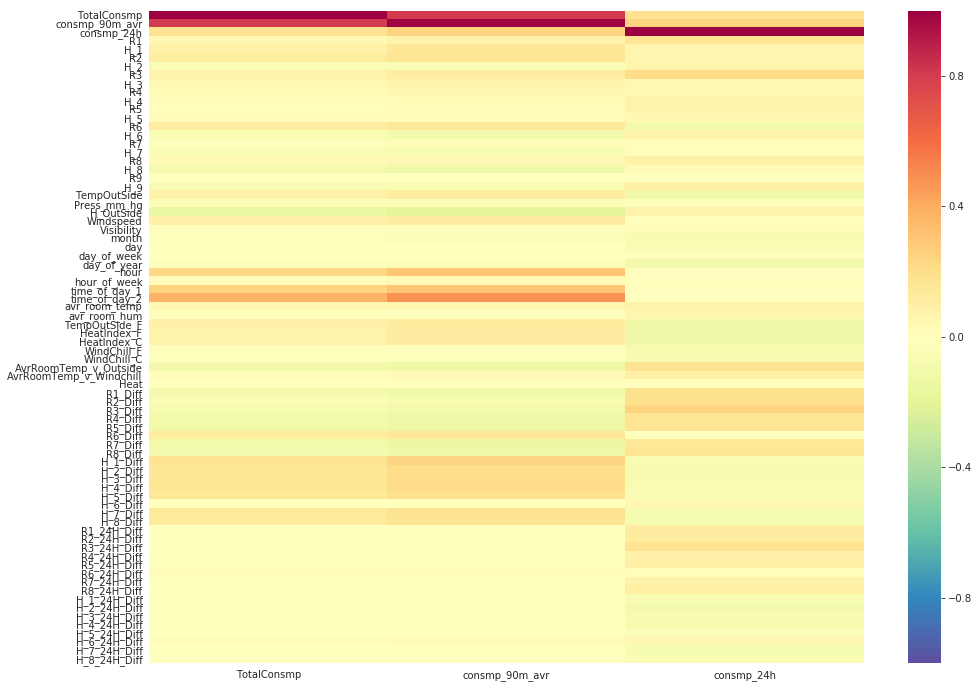

In [65]:
# correlations for all consumtpion variables
corr3 = corr_df.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr3.iloc[:,0:3], vmin=-1, vmax=1, 
            xticklabels=corr3.iloc[:,0:3].columns.values,
            yticklabels=corr3.columns.values, cmap='Spectral_r');

## Abbreviated Heatmap of Correlations

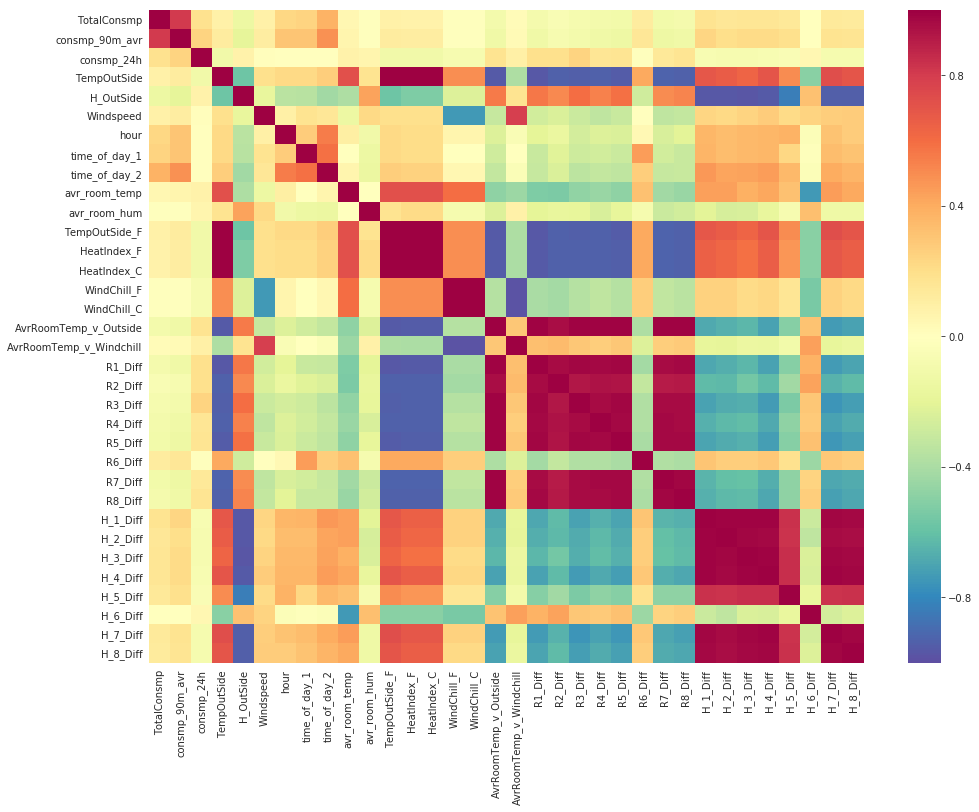

In [66]:
corr_df2 = corr_df[['TotalConsmp', 'consmp_90m_avr', 'consmp_24h', 'TempOutSide', 'H_OutSide',
       'Windspeed', 'hour', 'time_of_day_1', 'time_of_day_2',
       'avr_room_temp', 'avr_room_hum', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'R1_Diff', 'R2_Diff', 'R3_Diff',
       'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff', 'R8_Diff', 'H_1_Diff',
       'H_2_Diff', 'H_3_Diff', 'H_4_Diff', 'H_5_Diff', 'H_6_Diff', 'H_7_Diff',
       'H_8_Diff']]

# correlations for all consumtpion variables
corr2 = corr_df2.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr2, vmin=-1, vmax=1, 
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values, cmap='Spectral_r');

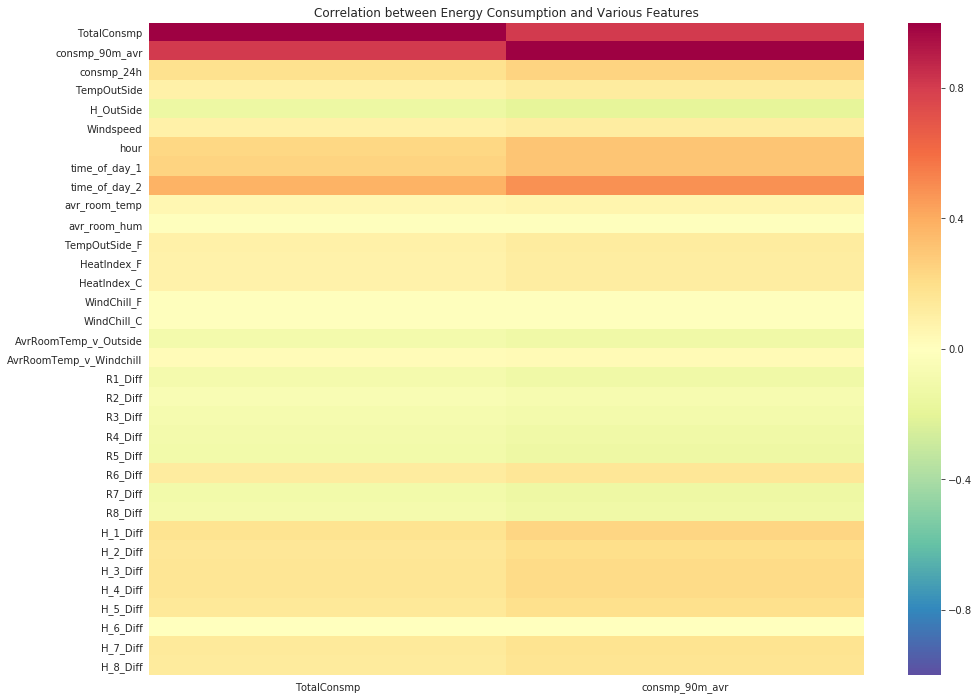

In [71]:
# correlations for all consumtpion variables
corr4 = corr_df2.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr4.iloc[:,0:2], vmin=-1, vmax=1, 
            xticklabels=corr4.iloc[:,0:2].columns.values,
            yticklabels=corr4.columns.values, cmap='Spectral_r')
plt.title('Correlation between Energy Consumption and Various Features');

## Total Consumption, Correlation List, Sorted

While not a "visualization" per se, this list of tuples allows us to more clearly see which features are more correlated with total energy consumption. We can see that time of day and features that measure humidity differences between the rooms and the outside have the highest correlations, with outside temperatures and windspeed following behind. 

In [44]:
# correlations with total consumption feature
corr_list = sorted(corr_df.corr().to_dict()['TotalConsmp'].items(), key=lambda x: x[1], reverse=True)
corr_list

[('TotalConsmp', 1.0),
 ('consmp_90m_avr', 0.8073615548533816),
 ('time_of_day_2', 0.38009047295713944),
 ('time_of_day_1', 0.24945183797522655),
 ('hour', 0.23235067350084168),
 ('consmp_24h', 0.18687072209972036),
 ('H_1_Diff', 0.1758321632405755),
 ('H_3_Diff', 0.1633927720711187),
 ('H_4_Diff', 0.1609941948181827),
 ('H_2_Diff', 0.14868526573784635),
 ('H_5_Diff', 0.14508088572558128),
 ('H_7_Diff', 0.13659248904910626),
 ('H_8_Diff', 0.12708500623853894),
 ('R6_Diff', 0.12003618365828174),
 ('R2', 0.11751091572984948),
 ('R6', 0.10953754350231193),
 ('H_1', 0.09263444403860273),
 ('TempOutSide', 0.09173337409257762),
 ('TempOutSide_F', 0.09173337409257715),
 ('Windspeed', 0.09015615193404318),
 ('HeatIndex_C', 0.08525666681905869),
 ('HeatIndex_F', 0.08525666681854391),
 ('R3', 0.07614278467856186),
 ('R1', 0.05267277030115365),
 ('avr_room_temp', 0.04772841357033604),
 ('H_3', 0.04561846392799617),
 ('R4', 0.03889124735409783),
 ('R8', 0.033435501521737646),
 ('hour_of_week', 0.0

## Total 24-Hour Consumption, Correlations, Sorted

Our first consumption metric only looks at 10 minute intervals. This metric looks at a 24-hour timeframe. When finding correlations on a 24-hour basis, we find that difference between room tempeatures and outside temperatures play a larger role than in the shorter-timeframe metric. 

In [58]:
# correlations with total consumption feature
corr_list = sorted(corr_df.corr().to_dict()['consmp_24h'].items(), key=lambda x: x[1], reverse=True)
corr_list

[('consmp_24h', 1.0),
 ('consmp_90m_avr', 0.24600591127564841),
 ('R3_Diff', 0.24485102104547019),
 ('R3', 0.21094213252031288),
 ('R1_Diff', 0.19488117254372497),
 ('R2_Diff', 0.19301122108367785),
 ('TotalConsmp', 0.18687072209972036),
 ('AvrRoomTemp_v_Outside', 0.1785769971297806),
 ('R3_24H_Diff', 0.17362652588222705),
 ('R5_Diff', 0.16800215291132978),
 ('R8_Diff', 0.16690733011286507),
 ('R4_Diff', 0.16380909481208972),
 ('R1', 0.159496590671393),
 ('R7_Diff', 0.1433373702857075),
 ('R2_24H_Diff', 0.12189669558359788),
 ('R1_24H_Diff', 0.11565790825748436),
 ('R8_24H_Diff', 0.10654189131356978),
 ('AvrRoomTemp_v_Windchill', 0.10148933726688102),
 ('H_9', 0.09553099667294777),
 ('R5_24H_Diff', 0.09379257818536574),
 ('R8', 0.09142514768328198),
 ('R4_24H_Diff', 0.08719715093261086),
 ('avr_room_temp', 0.08434241326058597),
 ('H_OutSide', 0.08293692158928245),
 ('H_6', 0.07944487296331525),
 ('R7_24H_Diff', 0.07415610162030414),
 ('R5', 0.07198332877144721),
 ('H_4', 0.071845692068

## Takeaways from Correlations

In the short-term, factors that have the most impact on energy consumption are:

* Time of day
* Outside humidity

In the long-term, factors that also contribute significantly to energy consumption are:

* Outside temperature
* Outside humidity
* Heat index / wind chill

# Rooms

## Room 6 is Different

The bar chart below shows mean room temperatures for our 8 rooms. 

* Room 6 immediately sticks out! It has a much lower temperature than the rest
* Of the other rooms, it seems like Rooms 2, 5, and 8 have the lowest temperatures
* Rooms 1, 3 and 7 have had the highest temperatures

In [0]:
rooms_only = df[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']]
rooms_diff = df[['R1_Diff', 'R2_Diff', 'R3_Diff', 'R4_Diff', 'R5_Diff', 
                 'R6_Diff', 'R7_Diff', 'R8_Diff']]

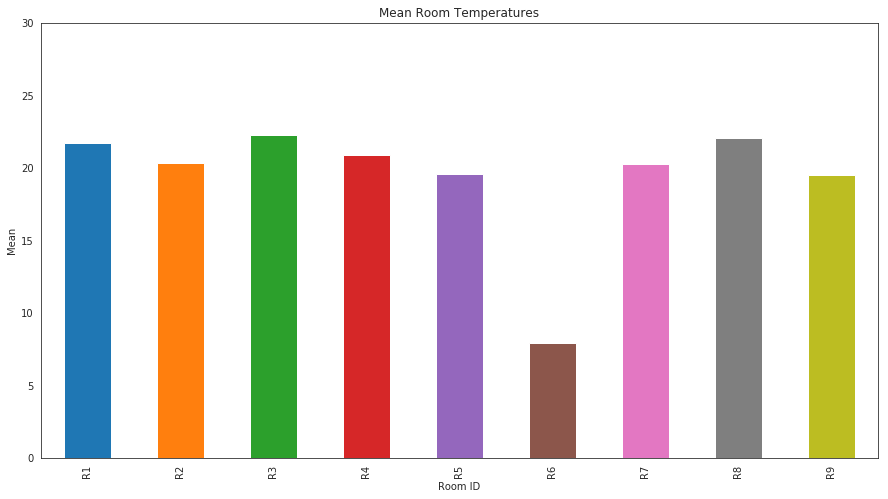

In [47]:
# plot of mean room temperatures
rooms_mean = np.mean(rooms_only)

sns.set_style("white")
plt.figure(figsize=(15,8))

rooms_mean.plot.bar()
plt.ylabel('Mean')
plt.xlabel('Room ID')
plt.title('Mean Room Temperatures')
plt.yticks(np.arange(0, 35, 5));

## Standard Deviation of Room Temperatures

* Room 6 also has, by far, the highest standard deviation

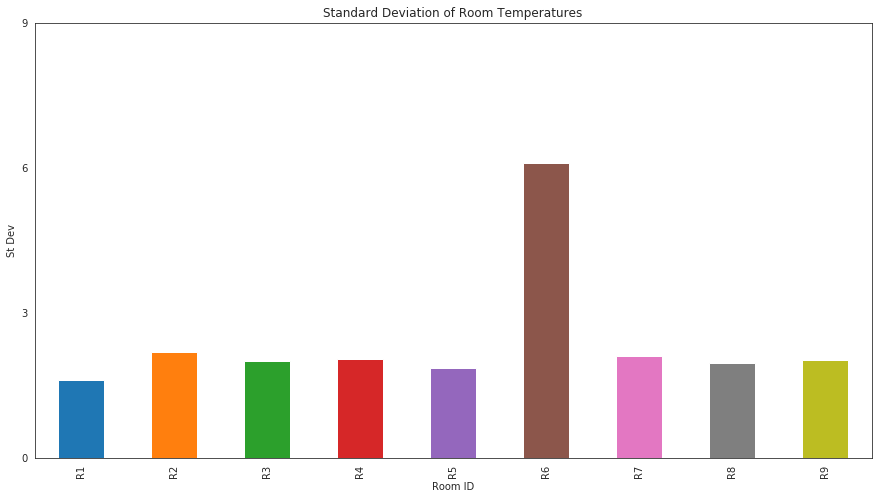

In [48]:
# room standard deviation
rooms_std = np.std(rooms_only)

sns.set_style("white")

plt.figure(figsize=(15,8))
rooms_std.plot.bar()

plt.ylabel('St Dev')
plt.xlabel('Room ID')
plt.title('Standard Deviation of Room Temperatures')
plt.yticks(np.arange(0, 10, 3));

## Distributions of Room Temperatures

Once again, we can see Room 6 is different

* Room 6 has a much wider distribution range than all the other rooms

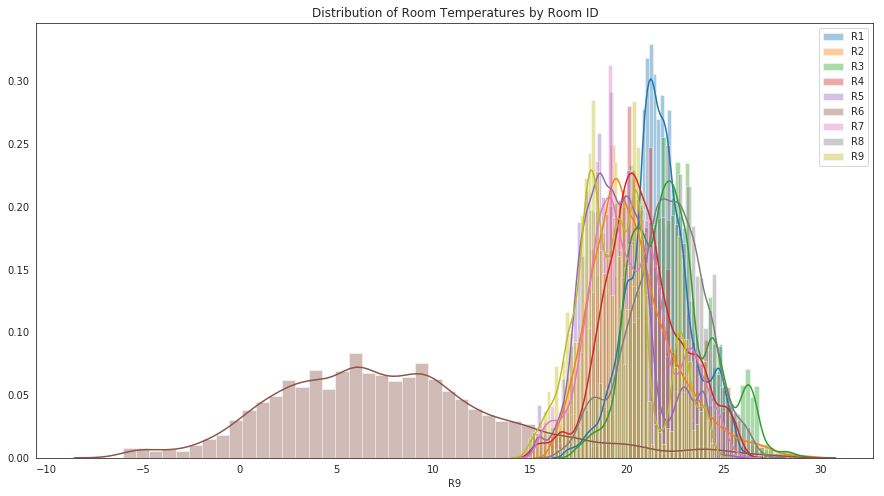

In [0]:
plt.figure(figsize=(15,8))

for i in rooms_only:
  sns.distplot(df[i], label=i)

plt.title('Distribution of Room Temperatures by Room ID')
plt.legend();

## Room 6 Temps Similar to Outside

* Finally, we can see that Room 6 temperatures differ very little from outside
* We can assume based on this that Room 6 is neither heated or cooled
* We don't know Room 6's usage, but could be storage

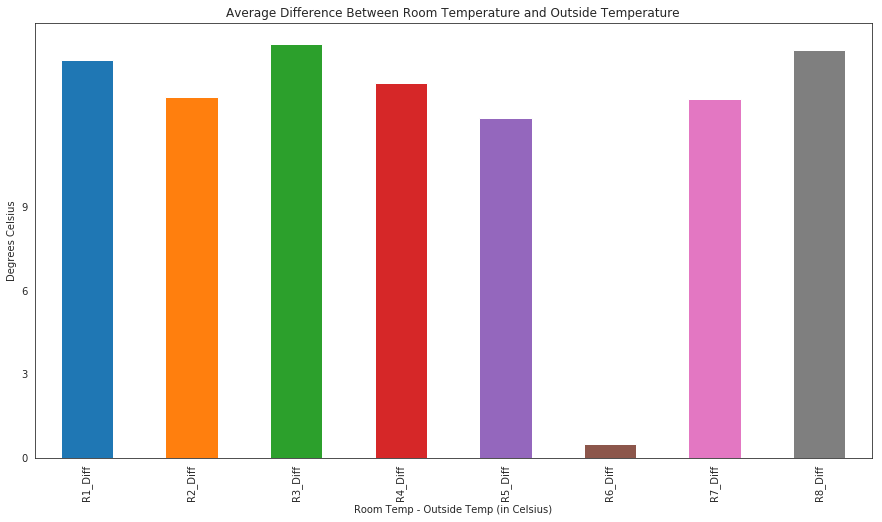

In [49]:
# room standard deviation
rooms_diff_mean = np.mean(rooms_diff)

sns.set_style("white")

plt.figure(figsize=(15,8))
rooms_diff_mean.plot.bar()

plt.ylabel('Degrees Celsius')
plt.xlabel('Room Temp - Outside Temp (in Celsius)')
plt.title('Average Difference Between Room Temperature and Outside Temperature')
plt.yticks(np.arange(0, 10, 3));

# Visualizations

## Spikes in Activity

Biggest issue in dealing with dataset is the spikes in activity. In this 3 day sample, we can see:

* Approximately 12 - 15 spikes
* In the largest activity spike, energy consuption increases over 6-fold
* Most spikes only last for 30 - 90 minutes
* Spikes make prediction more difficult
* Spikes are unlikely to be related to weather given the 
* Smoothing out data may help in prediction

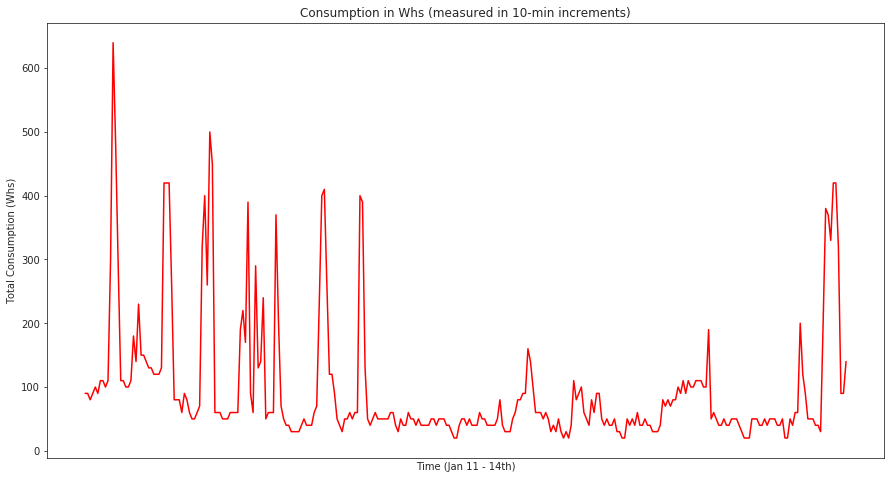

In [0]:
sns.set_style('ticks')
plt.figure(figsize=(15,8))

sns.lineplot(x='date', y='TotalConsmp', data=df[:300], color='red');
plt.xticks([])
plt.xlabel('Time (Jan 11 - 14th)')
plt.ylabel('Total Consumption (Whs)')
plt.title('Consumption in Whs (measured in 10-min increments)');

## Distribution Chart of Increases in Energy Consumption over Prior 10-Minute Period

* Shows most 10-minute periods are similar to prior period
* There are, however, a small percentage of periods with large increases of 100 - 300 Whs that distort data

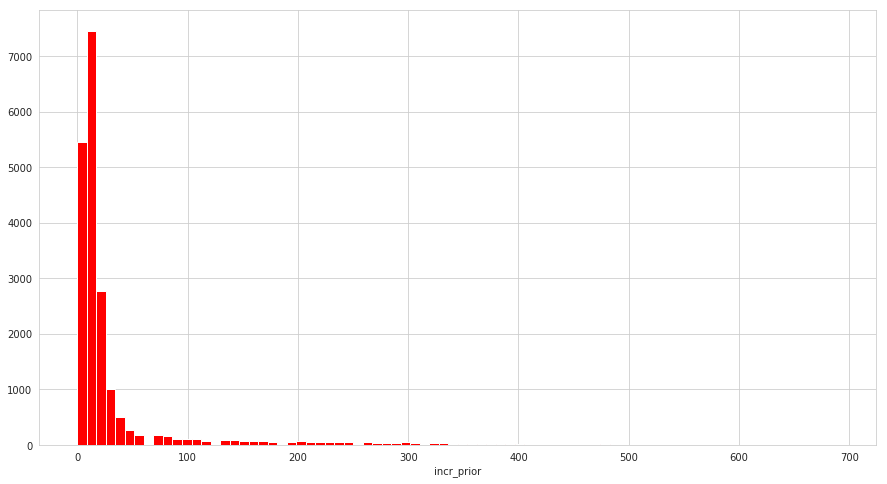

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.distplot(df['incr_prior'], bins=80, kde=None, color='red',hist_kws=dict(alpha=1) );

## Distribution Plot of Total Consumption

* Data has long right-tail

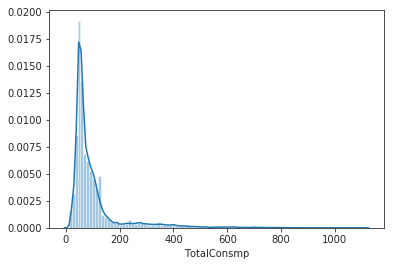

In [0]:
sns.distplot(df['TotalConsmp'], bins=100)

## Total Consumption by Hour of Day

* Low activity from 2 AM - 5 AM
* Activity starts to pick up at 5 AM
* Peak seems to be 9AM to 7PM (hour 19)
* Activity starts to taper off quickly around 11 PM (hour 23)

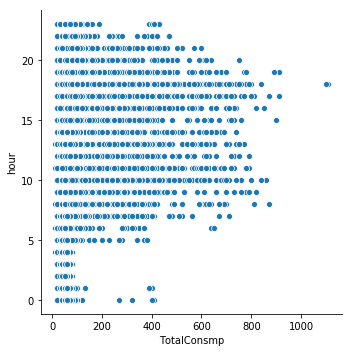

In [0]:
sns.relplot(x='TotalConsmp', y='hour', data=df)

## Day of Week Scatterplot

In this scatterplot, 0=Monday, 1=Tuesday, ..., 6=Sunday. 

This scatterplot doesn't give us great info about 'average consumption' for certain days, but it does give us some useful info:

* We can see the days that tend to have the largest outliers (Mon, Thurs, Fri, Sat)
* We can see that Tuesdays rarely have outliers

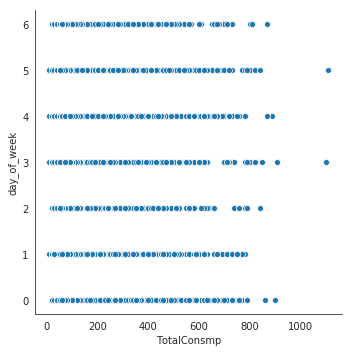

In [0]:
sns.relplot(x='TotalConsmp', y='day_of_week', data=df)

## Energy Consumption by Day of Week

This bar chart gives us a better sense of average consumption by day. 

* Mondays have the highest mean consumption
* Friday and Saturday are the next highest "mean consumption" days
* As with our previous chart, we see that Tuesday has the lowest consumption

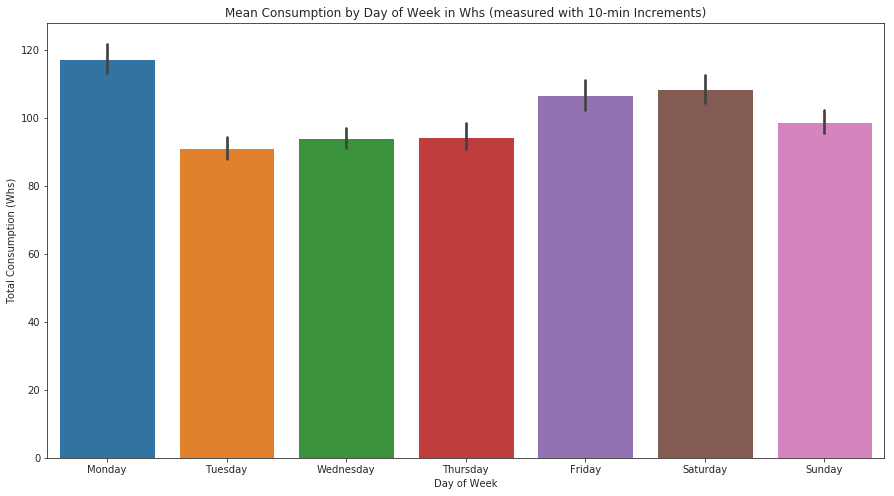

In [0]:
plt.figure(figsize=(15,8))
sns.barplot(x='day_week_alpha', y='TotalConsmp', data=df)
# sns.barplot(x='day_week_alpha', y='consmp_24h', data=df)
plt.xlabel('Day of Week')
plt.ylabel('Total Consumption (Whs)')
plt.title('Mean Consumption by Day of Week in Whs (measured with 10-min Increments)');

## Energy Consumption by Month

Our sample only runs from January ("1") to May ("5"). From this data:

* February had the highest mean energy consumption
* May had the lowest mean energy consumption
* Differences from month to month seem relatively small
* Weather likely plays a role given declining energy usage as the weather tends to warm up

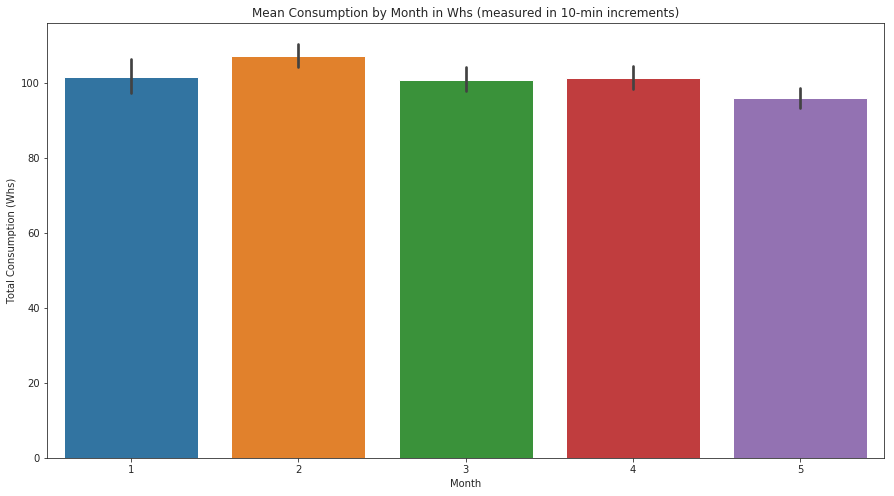

In [0]:
plt.figure(figsize=(15,8))
sns.barplot(x='month', y='TotalConsmp', data=df)
plt.xlabel('Month')
plt.ylabel('Total Consumption (Whs)')
plt.title('Mean Consumption by Month in Whs (measured in 10-min increments)');

## Mean Outside Temperature By Month

We verify the temperature trend in this chart. No big surprises. 

* January is the closest month with average temp just below 40F
* May is the warmest month with average temp around 55F
* Average temperature increases every month from January to May

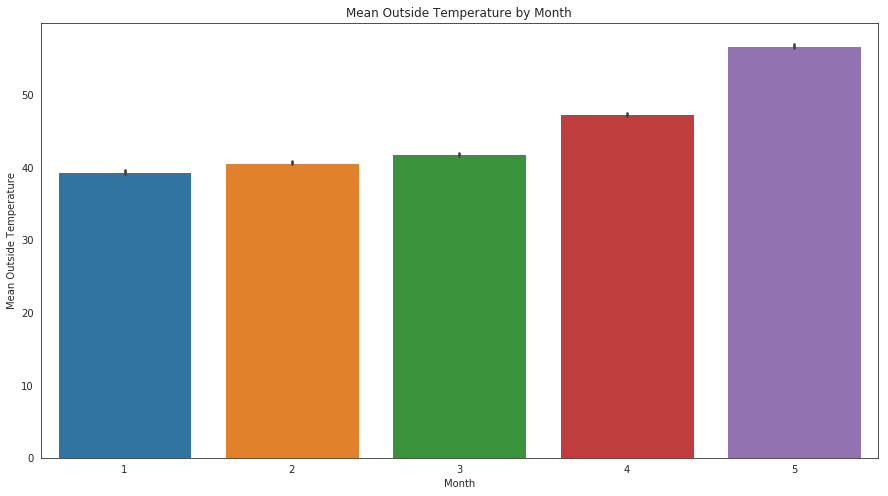

In [0]:
plt.figure(figsize=(15,8))
sns.barplot(x='month', y='TempOutSide_F', data=df)
plt.xlabel('Month')
plt.ylabel('Mean Outside Temperature')
plt.title('Mean Outside Temperature by Month');

## Mean Hourly Energy Consumption

Hours are labeled using military time (e.g. 12 AM = 0, 12PM = 12, 11PM = 23)

* Energy usage very low in from 11 PM to 6 AM
* Energy consumption picks up around 7 AM
* There's a mini lunch time peak running from 10 AM - 2 PM
* There's a larger dinner time / evening peak from 5PM - 8 PM

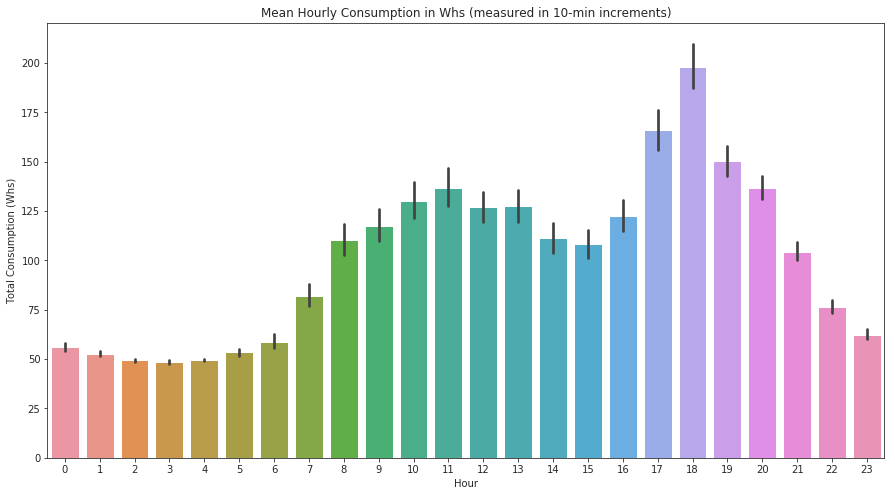

In [0]:
plt.figure(figsize=(15,8))
sns.barplot(x='hour', y='TotalConsmp', data=df)
plt.xlabel('Hour')
plt.ylabel('Total Consumption (Whs)')
plt.title('Mean Hourly Consumption in Whs (measured in 10-min increments)');

## Average Temperatures by Hour

From this, we can see that a lot of hourly energy usage isn't related to temperature.

* The evening peak energy usage hours tend to occur during the warmest parts of the day
* Likewise, the coldest times in the early morning have the lowest energy usage
* While temperature does impact energy usage, this makes clear that it's not the main driving factor

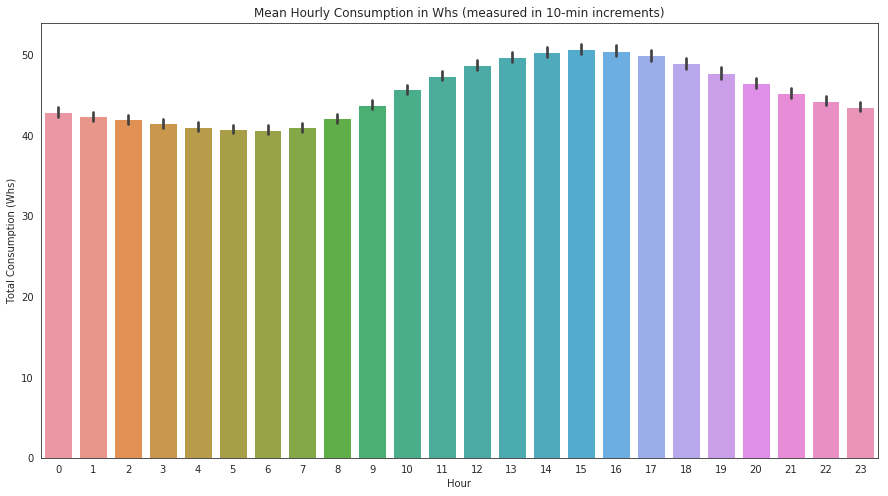

In [0]:
plt.figure(figsize=(15,8))
sns.barplot(x='hour', y='TempOutSide_F', data=df)
plt.xlabel('Hour')
plt.ylabel('Total Consumption (Whs)')
plt.title('Mean Hourly Consumption in Whs (measured in 10-min increments)');

## Daily Consumption (Jan 11 - May 27)

* Mean daily consumption varies substantially
* Heavy usage days see as much as 5 times the energy consumption as light usage days

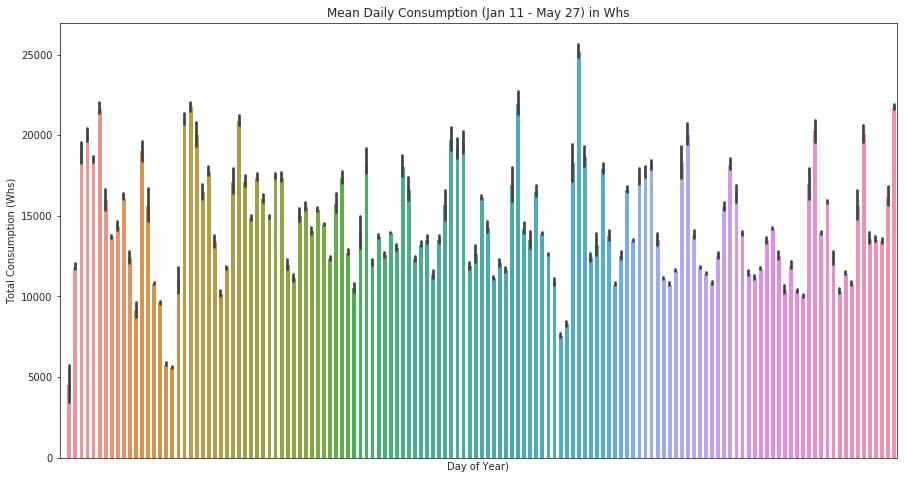

In [0]:
plt.figure(figsize=(15,8))
sns.barplot(x='day_of_year', y='consmp_24h', data=df)
plt.xlabel('Day of Year)')
plt.ylabel('Mean Daily Consumption (Whs)')
plt.xticks([])
plt.title('Mean Daily Consumption (Jan 11 - May 27) in Whs');

## Outside Temperatures vs Daily Energy Consumption

The chart below shows the connection between outside temperatures (in F) versus daily energy consumption. There is a negative correlation between the two features (i.e. higher outside temperatures result in lower energy consumption), but it is not very strong. Note however, that our sample only runs from January to May and does not include any summer months. 

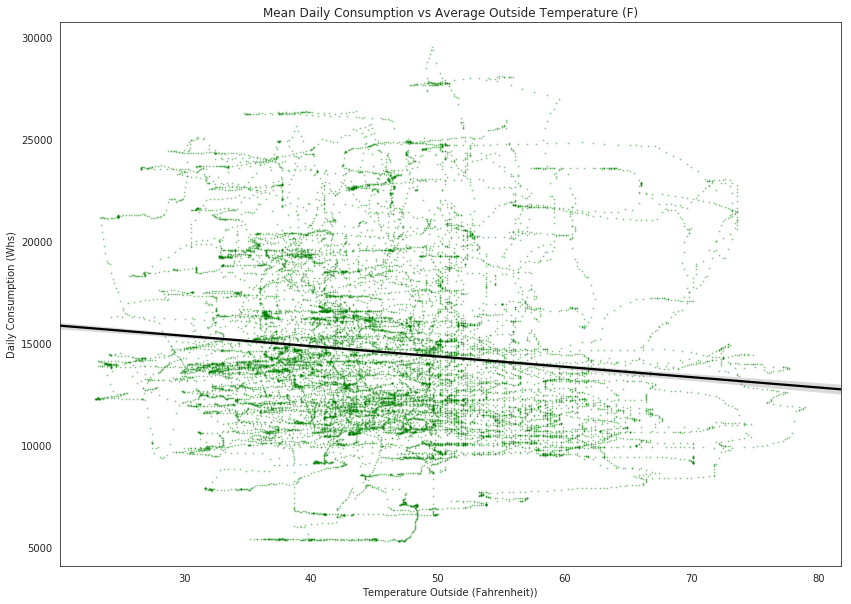

In [0]:
plt.figure(figsize=(14,10))
sns.regplot(x='TempOutSide_F', y='consmp_24h', data=df, color='black', marker='o', 
            scatter_kws={'s':1, "color":'green', 'alpha': 0.3}, line_kws={})
plt.xlabel('Temperature Outside (Fahrenheit))')
plt.ylabel('Daily Consumption (Whs)')
plt.title('Mean Daily Consumption vs Average Outside Temperature (F)');

## Room Temp-Outside Temp Difference vs Daily Energy Consumption

This chart is similar to the previous one except it shows the difference between average room temperatures versus the outside temperature on the X-axis (in degrees Celsius). A large difference suggests a colder day. 

We could also chart this on an absolute value basis, but it ends up not providing much additional info in this case, due to all of our datapoints coming in winter and spring.

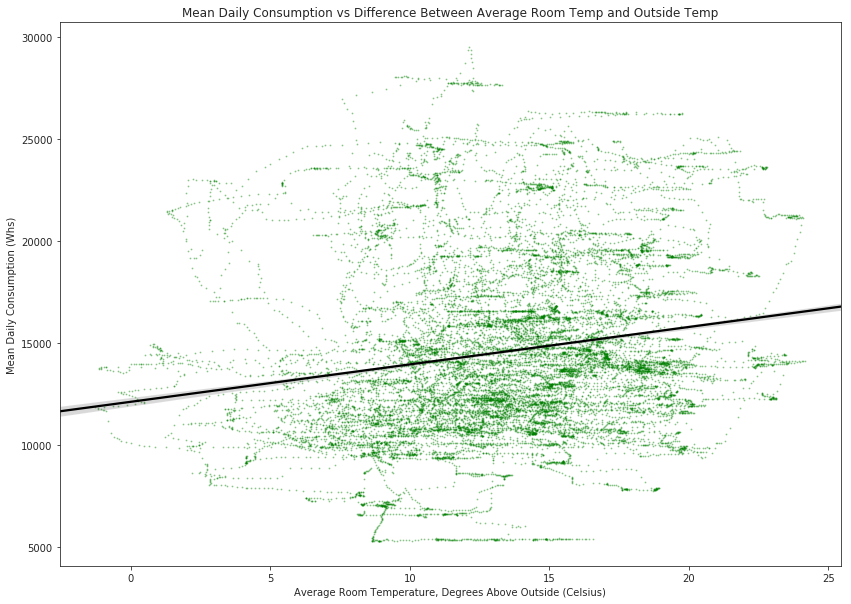

In [0]:
plt.figure(figsize=(14,10))
sns.regplot(x='AvrRoomTemp_v_Outside', y='consmp_24h', data=df, color='black', marker='o', 
            scatter_kws={'s':1, "color":'green', 'alpha': 0.3}, line_kws={})
plt.xlabel('Average Room Temperature, Degrees Above Outside (Celsius)')
plt.ylabel('Mean Daily Consumption (Whs)')
plt.title('Mean Daily Consumption vs Difference Between Average Room Temp and Outside Temp');

# Model for Total Consumption

In [50]:
corr_df.columns

Index(['TotalConsmp', 'consmp_90m_avr', 'consmp_24h', 'R1', 'H_1', 'R2', 'H_2',
       'R3', 'H_3', 'R4', 'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8',
       'H_8', 'R9', 'H_9', 'TempOutSide', 'Press_mm_hg', 'H_OutSide',
       'Windspeed', 'Visibility', 'month', 'day', 'day_of_week', 'day_of_year',
       'hour', 'hour_of_week', 'time_of_day_1', 'time_of_day_2',
       'avr_room_temp', 'avr_room_hum', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'Heat', 'R1_Diff', 'R2_Diff', 'R3_Diff',
       'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff', 'R8_Diff', 'H_1_Diff',
       'H_2_Diff', 'H_3_Diff', 'H_4_Diff', 'H_5_Diff', 'H_6_Diff', 'H_7_Diff',
       'H_8_Diff', 'R1_24H_Diff', 'R2_24H_Diff', 'R3_24H_Diff', 'R4_24H_Diff',
       'R5_24H_Diff', 'R6_24H_Diff', 'R7_24H_Diff', 'R8_24H_Diff',
       'H_1_24H_Diff', 'H_2_24H_Diff', 'H_3_24H_Diff', 'H_4_24H_Diff',
       'H_5_24H_Diff', 'H_6_24H_D

In [0]:
X_alt = corr_df[['R1', 'H_1', 'R2', 'H_2',
       'R3', 'H_3', 'R4', 'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8',
       'H_8', 'R9', 'H_9', 'TempOutSide', 'Press_mm_hg', 'H_OutSide',
       'Windspeed', 'Visibility', 'month', 'day', 'day_of_week', 'day_of_year',
       'hour', 'hour_of_week', 'time_of_day_1', 'time_of_day_2',
       'avr_room_temp', 'avr_room_hum', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'Heat', 'R1_Diff', 'R2_Diff', 'R3_Diff',
       'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff', 'R8_Diff', 'H_1_Diff',
       'H_2_Diff', 'H_3_Diff', 'H_4_Diff', 'H_5_Diff', 'H_6_Diff', 'H_7_Diff',
       'H_8_Diff']]
y_alt = corr_df['TotalConsmp']

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y_alt, test_size=0.30, random_state=44)

In [0]:
# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) : 
    if len(y_test) == len(y_pred):
        return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
      
# Root mean squared error (RMSE)
def rmse(y_pred, y_test):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [57]:
# Lasso Regression
lasso = Lasso()
model_lasso = lasso.fit(X_train_alt,y_train_alt)
pred_lasso = lasso.predict(X_test_alt)
result_lasso = model_lasso.score(X_test_alt, y_test_alt)
# cv_scores_lasso = cross_val_score(lasso, X_alt, y_alt, cv=5, scoring='neg_mean_squared_log_error')
# lasso_rmsle = np.sqrt(np.abs(cv_scores_lasso.mean()))

print("=== Lasso Regression ===")
print("R2: " + str(result_lasso))
print("RMSLE: " + str(rmsle(pred_lasso, y_test_alt)))
print("RMSE: " + str(rmse(pred_lasso, y_test_alt)))
# print("Mean RMSLE Score: ", lasso_rmsle.mean())
print("\n")

# Kernel Ridge Regression
kr = KernelRidge()
model_kr = kr.fit(X_train_alt,y_train_alt)
pred_kr = kr.predict(X_test_alt)
result_kr = model_kr.score(X_test_alt, y_test_alt)
# cv_scores_kr = cross_val_score(kr, X_alt, y_alt, cv=5, scoring='neg_mean_squared_log_error')
# kr_rmsle = np.sqrt(np.abs(cv_scores_kr.mean()))

print("=== Kernel Ridge Regression ===")
print("R2: " + str(result_kr))
print("RMSLE: " + str(rmsle(pred_kr, y_test_alt)))
print("RMSE: " + str(rmse(pred_kr, y_test_alt)))
# print("Mean RMSLE Score: ", kr_rmsle.mean())
print("\n")


# Linear Regression
lm = LinearRegression()
model_lm = lm.fit(X_train_alt,y_train_alt)
pred_lm = lm.predict(X_test_alt)
result_lm = model_lm.score(X_test_alt, y_test_alt)

print("=== Linear Regression ===")
print("R2: " + str(result_lm))
print("RMSLE: " + str(rmsle(pred_lm, y_test_alt)))
print("RMSE: " + str(rmse(pred_lm, y_test_alt)))
print("\n")


# # Decision Tree Regression
dtr = DecisionTreeRegressor()
model_dtr = dtr.fit(X_train_alt,y_train_alt)
pred_dtr = dtr.predict(X_test_alt)
result_dtr = model_dtr.score(X_test_alt, y_test_alt)

print("=== Decision Tree Regression ===")
print("R2: " + str(result_dtr))
print("RMSLE: " + str(rmsle(pred_dtr, y_test_alt)))
print("RMSE: " + str(rmse(pred_dtr, y_test_alt)))
print("\n")


# Random Forest Regression
rfr = RandomForestRegressor()
model_rfr = rfr.fit(X_train_alt,y_train_alt)
pred_rfr = rfr.predict(X_test_alt)
result_rfr = model_rfr.score(X_test_alt, y_test_alt)


print("=== Random Forest Regression ===")
print("R2: " + str(result_rfr))
print("RMSLE: " + str(rmsle(pred_rfr, y_test_alt)))
print("RMSE: " + str(rmse(pred_rfr, y_test_alt)))
print("\n")


# Extra Trees Regression
etr = ExtraTreesRegressor()
model_etr = etr.fit(X_train_alt,y_train_alt)
pred_etr = etr.predict(X_test_alt)
result_etr = model_etr.score(X_test_alt, y_test_alt)

cv_scores_etr = cross_val_score(etr, X_alt, y_alt, cv=5, scoring='neg_mean_squared_log_error')
etr_rmsle = np.sqrt(np.abs(cv_scores_etr.mean()))

print("=== Extra Trees Regression ===")
print("R2: " + str(result_etr))
print("RMSLE: " + str(rmsle(pred_etr, y_test_alt)))
print("RMSE: " + str(rmse(pred_etr, y_test_alt)))
print("Mean RMSLE Score: ", etr_rmsle.mean())
print("\n")

=== Lasso Regression ===
R2: 0.20930435962130234
RMSLE: 0.6031509844608632
RMSE: 92.52779825979103


=== Kernel Ridge Regression ===
R2: 0.2156287454242568
RMSLE: 0.6342755749172813
RMSE: 92.15701314870024


=== Linear Regression ===
R2: 0.2144135887381089
RMSLE: 0.6308076780753593
RMSE: 92.22837085809479


=== Decision Tree Regression ===
R2: 0.23891271101795009
RMSLE: 0.471605079257825
RMSE: 90.778873744154


=== Random Forest Regression ===
R2: 0.49987455238848943
RMSLE: 0.40577907435083727
RMSE: 73.58800555613284


=== Extra Trees Regression ===
R2: 0.5746632509735813
RMSLE: 0.3677477611039097
RMSE: 67.86314924788142
Mean RMSLE Score:  0.7664714654402375




In [58]:
# feature importance extra trees
et_fi=ExtraTreesRegressor()
et_fi.fit(X_alt, y_alt)
FI_et = pd.DataFrame({"Feature Importance":et_fi.feature_importances_}, index=X_alt.columns)
FI_et_sorted = FI_et.sort_values("Feature Importance",ascending=False)
print(FI_et_sorted.to_string())
FI_et_sorted.index

                       Feature Importance
time_of_day_2                     0.12345
hour                              0.04659
H_3                               0.02380
day                               0.02333
R3                                0.02169
Windspeed                         0.02099
R3_Diff                           0.02085
H_2                               0.02035
R1                                0.02011
Press_mm_hg                       0.01977
avr_room_hum                      0.01976
hour_of_week                      0.01964
H_1                               0.01956
day_of_week                       0.01952
H_6_Diff                          0.01951
R6_Diff                           0.01944
H_7                               0.01936
H_9                               0.01926
H_4                               0.01833
R8                                0.01831
H_8                               0.01808
R2_Diff                           0.01768
H_2_Diff                          

Index(['time_of_day_2', 'hour', 'H_3', 'day', 'R3', 'Windspeed', 'R3_Diff',
       'H_2', 'R1', 'Press_mm_hg', 'avr_room_hum', 'hour_of_week', 'H_1',
       'day_of_week', 'H_6_Diff', 'R6_Diff', 'H_7', 'H_9', 'H_4', 'R8', 'H_8',
       'R2_Diff', 'H_2_Diff', 'R2', 'Visibility', 'R4', 'R7_Diff', 'H_6',
       'H_5', 'H_5_Diff', 'H_3_Diff', 'H_1_Diff', 'R6', 'R5', 'H_7_Diff',
       'R4_Diff', 'H_8_Diff', 'R5_Diff', 'H_4_Diff', 'R9', 'R8_Diff',
       'day_of_year', 'avr_room_temp', 'R7', 'TempOutSide_F', 'HeatIndex_F',
       'R1_Diff', 'H_OutSide', 'HeatIndex_C', 'AvrRoomTemp_v_Outside',
       'TempOutSide', 'month', 'time_of_day', 'Heat'],
      dtype='object')

In [0]:
# Root mean squared error (RMSE)
def rmse(y_pred, y_test):
  return np.sqrt(mean_squared_error(y_test, y_pred))


# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) : 
    if len(y_test) == len(y_pred):
        return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))


class CvScore(object):
  def __init__(self, list, name_list, X, y, folds=5, score='neg_mean_squared_error', seed=77, split=0.25):
    self.X = X
    self.y = y
    self.folds = folds
    self.score = score
    self.seed = seed
    self.split = split
    self.model = list[0]
    self.list = list
    self.name = name_list[0]
    self.name_list = name_list
    
  def cv(self):
    cv_score = cross_val_score(self.model, self.X, self.y, cv=self.folds, scoring=self.score)
    score_array = np.sqrt(-cv_score)
    mean_rmse = np.mean(score_array)
    print("Mean RMSE: ", mean_rmse)
    
  def cv_list(self):
    for name, model in zip(self.name_list, self.list):
      cv_score = cross_val_score(model, self.X, self.y, cv=self.folds, scoring=self.score)
      score_array = np.sqrt(-cv_score)
      mean_rmse = np.mean(score_array)
      std_rmse = np.std(score_array)
      print("{}: {:.5f}, {:.4f}".format(name, mean_rmse, std_rmse))

In [0]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
lasso_lars = LassoLarsIC()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()
linear_svr = LinearSVR()
en = ElasticNet()
br = BayesianRidge()
kr = KernelRidge()

In [0]:
regression_list = [ridge, lasso, etr, gbr, linear_svr, en, br]
name_list = ["Ridge", "Lasso", "Extra Trees", "Grad Boost", "LinSVR", 
             "ElasticNet", "Bayesian Ridge"]

In [0]:
# model_one = CvScore(regression_list, name_list, X_alt, y_alt)
# model_one.cv_list()

# Model with Trailing 24-Hour Consumption

In [72]:
corr_df.columns

Index(['TotalConsmp', 'consmp_90m_avr', 'consmp_24h', 'R1', 'H_1', 'R2', 'H_2',
       'R3', 'H_3', 'R4', 'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8',
       'H_8', 'R9', 'H_9', 'TempOutSide', 'Press_mm_hg', 'H_OutSide',
       'Windspeed', 'Visibility', 'month', 'day', 'day_of_week', 'day_of_year',
       'hour', 'hour_of_week', 'time_of_day_1', 'time_of_day_2',
       'avr_room_temp', 'avr_room_hum', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'Heat', 'R1_Diff', 'R2_Diff', 'R3_Diff',
       'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff', 'R8_Diff', 'H_1_Diff',
       'H_2_Diff', 'H_3_Diff', 'H_4_Diff', 'H_5_Diff', 'H_6_Diff', 'H_7_Diff',
       'H_8_Diff', 'R1_24H_Diff', 'R2_24H_Diff', 'R3_24H_Diff', 'R4_24H_Diff',
       'R5_24H_Diff', 'R6_24H_Diff', 'R7_24H_Diff', 'R8_24H_Diff',
       'H_1_24H_Diff', 'H_2_24H_Diff', 'H_3_24H_Diff', 'H_4_24H_Diff',
       'H_5_24H_Diff', 'H_6_24H_D

In [0]:
X = corr_df[['R1', 'H_1', 'R2', 'H_2',
       'R3', 'H_3', 'R4', 'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8',
       'H_8', 'R9', 'H_9', 'TempOutSide', 'Press_mm_hg', 'H_OutSide',
       'Windspeed', 'Visibility', 'month', 'day', 'day_of_week', 'day_of_year',
       'hour', 'hour_of_week', 'time_of_day_1', 'time_of_day_2',
       'avr_room_temp', 'avr_room_hum', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'Heat', 'R1_Diff', 'R2_Diff', 'R3_Diff',
       'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff', 'R8_Diff', 'H_1_Diff',
       'H_2_Diff', 'H_3_Diff', 'H_4_Diff', 'H_5_Diff', 'H_6_Diff', 'H_7_Diff',
       'H_8_Diff', 'R1_24H_Diff', 'R2_24H_Diff', 'R3_24H_Diff', 'R4_24H_Diff',
       'R5_24H_Diff', 'R6_24H_Diff', 'R7_24H_Diff', 'R8_24H_Diff',
       'H_1_24H_Diff', 'H_2_24H_Diff', 'H_3_24H_Diff', 'H_4_24H_Diff',
       'H_5_24H_Diff', 'H_6_24H_Diff', 'H_7_24H_Diff', 'H_8_24H_Diff']]
y = corr_df['consmp_24h']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [0]:

# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) : 
    if len(y_test) == len(y_pred):
        return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
      
# Root mean squared error (RMSE)
def rmse(y_pred, y_test):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [83]:
# Lasso Regression
lasso = Lasso()
model_lasso = lasso.fit(X_train,y_train)
pred_lasso = lasso.predict(X_test)
result_lasso = model_lasso.score(X_test, y_test)

print("=== Lasso Regression ===")
print("R2: " + str(result_lasso))
print("RMSLE: " + str(rmsle(pred_lasso, y_test)))
print("RMSE: " + str(rmse(pred_lasso, y_test)))
print("\n")

# Kernel Ridge Regression
kr = KernelRidge()
model_kr = kr.fit(X_train,y_train)
pred_kr = kr.predict(X_test)
result_kr = model_kr.score(X_test, y_test)

print("=== Kernel Ridge Regression ===")
print("R2: " + str(result_kr))
print("RMSLE: " + str(rmsle(pred_kr, y_test)))
print("RMSE: " + str(rmse(pred_kr, y_test)))
print("\n")


# Linear Regression
lm = LinearRegression()
model_lm = lm.fit(X_train,y_train)
pred_lm = lm.predict(X_test)
result_lm = model_lm.score(X_test, y_test)

print("=== Linear Regression ===")
print("R2: " + str(result_lm))
print("RMSLE: " + str(rmsle(pred_lm, y_test)))
print("RMSE: " + str(rmse(pred_lm, y_test)))
print("\n")


# # Decision Tree Regression
dtr = DecisionTreeRegressor()
model_dtr = dtr.fit(X_train,y_train)
pred_dtr = dtr.predict(X_test)
result_dtr = model_dtr.score(X_test, y_test)

print("=== Decision Tree Regression ===")
print("R2: " + str(result_dtr))
print("RMSLE: " + str(rmsle(pred_dtr, y_test)))
print("RMSE: " + str(rmse(pred_dtr, y_test)))
print("\n")


# Random Forest Regression
rfr = RandomForestRegressor()
model_rfr = rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)
result_rfr = model_rfr.score(X_test, y_test)


print("=== Random Forest Regression ===")
print("R2: " + str(result_rfr))
print("RMSLE: " + str(rmsle(pred_rfr, y_test)))
print("RMSE: " + str(rmse(pred_rfr, y_test)))
print("\n")


# Extra Trees Regression
etr = ExtraTreesRegressor()
model_etr = etr.fit(X_train,y_train)
pred_etr = etr.predict(X_test)
result_etr = model_etr.score(X_test, y_test)
cv_scores_etr = cross_val_score(etr, X, y, cv=5, scoring='neg_mean_squared_log_error')
etr_rmsle = np.sqrt(np.abs(cv_scores_etr.mean()))

print("=== Extra Trees Regression ===")
print("R2: " + str(result_etr))
print("RMSLE: " + str(rmsle(pred_etr, y_test)))
print("RMSE: " + str(rmse(pred_etr, y_test)))
print("Mean RMSLE Score: ", etr_rmsle.mean())
print("\n")

=== Lasso Regression ===
R2: 0.6132295918111274
RMSLE: 0.19724071315994404
RMSE: 2697.045419100744


=== Kernel Ridge Regression ===
R2: 0.6338721269666407
RMSLE: 0.19461017040353903
RMSE: 2624.0858361667133


=== Linear Regression ===
R2: 0.6357937829869624
RMSLE: 0.1975408682238497
RMSE: 2617.1903977646316


=== Decision Tree Regression ===
R2: 0.9628558031273756
RMSLE: 0.052532034337590995
RMSE: 835.8091611036207


=== Random Forest Regression ===
R2: 0.9944108077166537
RMSLE: 0.022108890143844557
RMSE: 324.2172861068197


=== Extra Trees Regression ===
R2: 0.9977262547545201
RMSLE: 0.013573275106066273
RMSE: 206.7914329954834
Mean RMSLE Score:  0.33618870267677936




In [81]:
# feature importance of lasso model
lasso_fi=Lasso()
lasso_fi.fit(X, y)
FI_lasso = pd.DataFrame({"Feature Importance":lasso_fi.coef_}, index=X.columns)
FI_sorted = FI_lasso.sort_values("Feature Importance",ascending=False)
print(FI_sorted.to_string())
FI_sorted.index

                         Feature Importance
avr_room_temp                    3564.13581
R3_24H_Diff                      1979.06315
R3                               1509.41194
H_1_24H_Diff                     1467.01179
TempOutSide                       998.86155
R8_24H_Diff                       738.43285
R6_Diff                           708.78773
R1_24H_Diff                       689.17168
R3_Diff                           505.65088
time_of_day_1                     492.78108
month                             411.57834
R7_24H_Diff                       377.14260
R4                                290.83837
H_2                               280.93183
H_9                               273.12586
R6_24H_Diff                       207.71388
AvrRoomTemp_v_Outside             202.55226
H_1                               163.77746
H_4                               161.31031
H_7                               158.09283
R1                                118.49104
H_4_24H_Diff                    

Index(['avr_room_temp', 'R3_24H_Diff', 'R3', 'H_1_24H_Diff', 'TempOutSide',
       'R8_24H_Diff', 'R6_Diff', 'R1_24H_Diff', 'R3_Diff', 'time_of_day_1',
       'month', 'R7_24H_Diff', 'R4', 'H_2', 'H_9', 'R6_24H_Diff',
       'AvrRoomTemp_v_Outside', 'H_1', 'H_4', 'H_7', 'R1', 'H_4_24H_Diff',
       'H_5', 'H_6', 'R7', 'H_8', 'R4_Diff', 'Windspeed', 'Press_mm_hg',
       'H_4_Diff', 'R1_Diff', 'H_2_Diff', 'H_8_Diff', 'Visibility',
       'WindChill_F', 'H_7_Diff', 'AvrRoomTemp_v_Windchill', 'H_3_24H_Diff',
       'hour_of_week', 'HeatIndex_C', 'day_of_week', 'WindChill_C', 'H_5_Diff',
       'HeatIndex_F', 'time_of_day_2', 'H_8_24H_Diff', 'H_5_24H_Diff', 'day',
       'R5_Diff', 'R5', 'H_1_Diff', 'H_6_Diff', 'hour', 'H_3_Diff',
       'H_6_24H_Diff', 'day_of_year', 'R2_Diff', 'H_OutSide', 'R8_Diff',
       'R7_Diff', 'TempOutSide_F', 'H_7_24H_Diff', 'R2', 'R8', 'H_3', 'R6',
       'R5_24H_Diff', 'avr_room_hum', 'R4_24H_Diff', 'H_2_24H_Diff', 'Heat',
       'R2_24H_Diff', 'R9'],
      dt

In [82]:
# feature importance of random forest model
rf_fi=RandomForestRegressor()
rf_fi.fit(X, y)
FI_rf = pd.DataFrame({"Feature Importance":rf_fi.feature_importances_}, index=X.columns)
FI_rf_sorted = FI_rf.sort_values("Feature Importance",ascending=False)
print(FI_rf_sorted.to_string())
FI_rf_sorted.index

                         Feature Importance
R3                                  0.18540
day_of_year                         0.14627
hour_of_week                        0.09942
day                                 0.07517
R3_Diff                             0.04464
R8_24H_Diff                         0.04174
R8                                  0.02549
R6_24H_Diff                         0.02522
R2_24H_Diff                         0.02443
H_7                                 0.02390
Press_mm_hg                         0.01826
R7                                  0.01691
R3_24H_Diff                         0.01614
H_6_24H_Diff                        0.01457
R9                                  0.01414
H_7_24H_Diff                        0.01387
R4                                  0.01327
R4_24H_Diff                         0.01230
R5_24H_Diff                         0.01192
H_2_24H_Diff                        0.00974
H_3_24H_Diff                        0.00950
H_8_24H_Diff                    

Index(['R3', 'day_of_year', 'hour_of_week', 'day', 'R3_Diff', 'R8_24H_Diff',
       'R8', 'R6_24H_Diff', 'R2_24H_Diff', 'H_7', 'Press_mm_hg', 'R7',
       'R3_24H_Diff', 'H_6_24H_Diff', 'R9', 'H_7_24H_Diff', 'R4',
       'R4_24H_Diff', 'R5_24H_Diff', 'H_2_24H_Diff', 'H_3_24H_Diff',
       'H_8_24H_Diff', 'H_2', 'H_4', 'R7_24H_Diff', 'month', 'H_6',
       'H_5_24H_Diff', 'H_3', 'AvrRoomTemp_v_Windchill', 'Windspeed', 'H_5',
       'R5', 'H_9', 'R1_24H_Diff', 'H_1', 'H_1_24H_Diff', 'H_4_24H_Diff',
       'H_5_Diff', 'avr_room_temp', 'R1', 'H_6_Diff', 'R2_Diff', 'H_8',
       'R6_Diff', 'day_of_week', 'H_OutSide', 'R1_Diff', 'WindChill_C', 'hour',
       'R4_Diff', 'time_of_day_1', 'WindChill_F', 'R2', 'avr_room_hum',
       'R7_Diff', 'R6', 'R8_Diff', 'AvrRoomTemp_v_Outside', 'H_3_Diff',
       'time_of_day_2', 'Visibility', 'H_4_Diff', 'H_8_Diff', 'TempOutSide_F',
       'HeatIndex_C', 'H_2_Diff', 'R5_Diff', 'HeatIndex_F', 'H_1_Diff',
       'H_7_Diff', 'TempOutSide', 'Heat'],
      dt

In [0]:
regression_list = [lr, ridge, lasso, lasso_lars, rfr, etr, gbr, svr, linear_svr, en, br, kr]
name_list = ["Linear", "Ridge", "Lasso", "Lasso Lars", "Random Forest", "Extra Trees", "Grad Boost", "SVR", "LinSVR", 
             "ElasticNet", "Bayesian Ridge", "Kernel Ridge"]

In [0]:
# model performance in RMSE, standard deviation
model_one = CvScore(regression_list, name_list, X, y)
model_one.cv_list()

Linear: 38665.85206, 69421.5645
Ridge: 3741.09582, 742.5882
Lasso: 3614.85147, 732.8670
Lasso Lars: 3917.91955, 845.6153
Random Forest: 5041.84164, 860.5027
Extra Trees: 5022.34496, 971.4466
Grad Boost: 4443.59110, 764.9526
SVR: 4482.46710, 800.1719
LinSVR: 3569.02738, 703.8798
ElasticNet: 3696.07057, 722.0276
Bayesian Ridge: 3909.43739, 802.4945
Kernel Ridge: 3740.01273, 742.7158


# Ideas for Improving Model

* Scale data


# Old Code

In [0]:
# dealing with outliers
# df_v2 = df.drop(df[(df['incr_prior_%'] > (1*np.std(df['incr_prior']))) | (df['incr_prior'] > np.std(df['incr_prior']))].index, inplace=False)

In [0]:
# df_v2.columns

Index(['date', 'TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'day_week_alpha',
       'avr_room_temp', 'avr_room_hum', 'Incr_Prior', 'incr_prior_%',
       'R1_Diff', 'R1_Diff_Abs', 'R2_Diff', 'R2_Diff_Abs', 'R3_Diff',
       'R3_Diff_Abs', 'R4_Diff', 'R4_Diff_Abs', 'R5_Diff', 'R5_Diff_Abs',
       'R6_Diff', 'R6_Diff_Abs', 'R7_Diff', 'R7_Diff_Abs', 'R8_Diff',
       'R8_Diff_Abs', 'incr_prior', 'consmp_90m_avr', 'TempOutSide_F',
       'HeatIndex_F', 'HeatIndex_C', 'AvrRoomTemp_v_Outside', 'AC',
       'time_of_day'],
      dtype='object')

In [0]:
# X = df_v2[['R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
#        'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
#        'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
#        'month', 'day', 'day_of_week', 'day_of_year', 'hour', 
#        'avr_room_temp', 'avr_room_hum', 
#        'R1_Diff', 'R1_Diff_Abs', 'R2_Diff', 'R2_Diff_Abs', 'R3_Diff',
#        'R3_Diff_Abs', 'R4_Diff', 'R4_Diff_Abs', 'R5_Diff', 'R5_Diff_Abs',
#        'R6_Diff', 'R6_Diff_Abs', 'R7_Diff', 'R7_Diff_Abs', 'R8_Diff',
#        'R8_Diff_Abs',  'TempOutSide_F',
#        'HeatIndex_F', 'HeatIndex_C', 'AvrRoomTemp_v_Outside', 'AC',
#        'time_of_day']]
# y = df_v2['consmp_90m_avr']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)